In [1]:
from __future__ import division #necessary to perform division of ints effectively cast into floats before division

import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rand

import IsingClass #module written to carry out the required calculations (metropolis, neighbours, energy, magnetization, etc.)

#ipython, plot in notebook
%matplotlib inline 

The main idea is to use the square grid using as the y-component an array of dimension 1.

In [4]:
#decouple the dimensions of the grid
Nx = 100
Ny = 1

J = 1.0 #coupling in the hamiltonian

model = IsingClass.Ising()

In [21]:
steps = 2000 #steps for equilibrium
temp_steps = 100 #step size for increase in temperature [J/k]

kT = np.linspace(0.1,4.0,temp_steps) #temperature values

#arrays for future plotting
magnetization = np.zeros(temp_steps) 
Energy = np.zeros(temp_steps)
susceptibility = np.zeros(temp_steps)
specific_heat = np.zeros(temp_steps)
mag_square = np.zeros(temp_steps) 
e_square = np.zeros(temp_steps) 

for l in range(len(kT)):
    temperature = kT[l]
    
    #initialise observables to zero
    M = 0
    E = 0
    M_sq = 0
    E_sq = 0
    
    #reset to random initial configuration
    lattice = model.spin_config(Nx,Ny)  
    
    #set out to reach equilibrium
    for t in range(steps):
        model.metropolis(lattice, temperature,Nx,Ny,J)
        
    #collect statistics
    stat_steps = int(steps/2) 
    for k in range(stat_steps):  
        
        model.metropolis(lattice, temperature,Nx,Ny,J) 

        mag = model.mag_per_spin(lattice,Nx,Ny)
        mag2 = model.mag2_per_spin(lattice,Nx,Ny)
        engy = model.energy(lattice,Nx,Ny,J)
        engy2 = model.energy2(lattice,Nx,Ny,J)
        
        M += mag
        E += engy
        M_sq += mag2
        E_sq += engy2
        
    #observables, after equilibrium is achieved, normalised by sweeps
    magnetization[l] = abs(M)/stat_steps 
    Energy[l] = E/stat_steps 
    mag_square[l] = M_sq/stat_steps
    e_square[l] = E_sq/stat_steps
    
#perform manipulation directly on array instead of loop
susceptibility = (mag_square - magnetization**2)/kT
specific_heat = (e_square - Energy**2)/(kT**2)

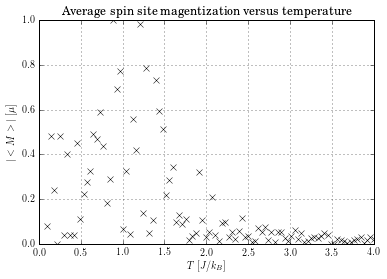

In [22]:
plt.figure()
plt.plot(kT, magnetization, 'kx')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.title("Average spin site magentization versus temperature")
plt.xlabel("$T$ $[J/k_B]$")
plt.ylabel("$|<M>|$ $[\mu]$")

plt.grid()
#plt.savefig('av_mag_rand.eps')

plt.show()



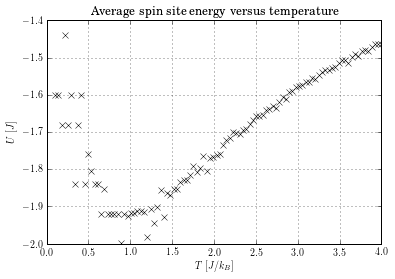

In [23]:
plt.figure()
plt.plot(kT, Energy, 'kx')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.title("Average spin site energy versus temperature")
plt.xlabel("$T$ $[J/k_B]$")
plt.ylabel("$U$ $[J]$")
plt.grid()
#plt.savefig('av_erg_black_try1D.eps')

plt.show()

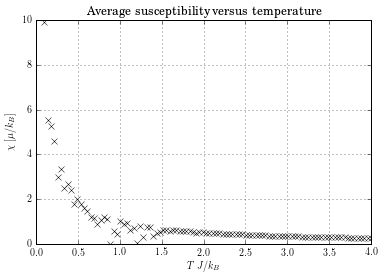

In [24]:
plt.figure()
plt.plot(kT, susceptibility, 'kx')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.title("Average susceptibility versus temperature")
plt.xlabel("$T$ $J/k_B$")
plt.ylabel("$\chi$ $[\mu/ k_B]$")

plt.grid()
#plt.savefig('av_suscpt1D.eps')

plt.show()

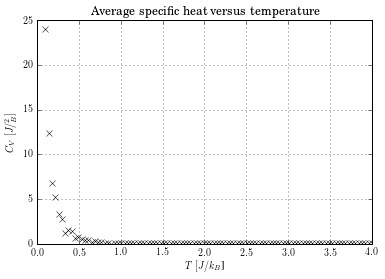

In [25]:
plt.figure()
plt.plot(kT, specific_heat, 'kx')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.title("Average specific heat versus temperature")
plt.xlabel("$T$ $[J/k_B$]")
plt.ylabel("$C_V$ $[J/_B^2]$")

plt.grid()
plt.savefig('av_C1D.eps')

plt.show()